# Monitor SFTPRO MD for Laslett coefficients (26/08/2024)

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter
import pytz
from datetime import timedelta, timezone

In [155]:
script_path = 'nxcals_helpers.py'
with open(script_path, 'r') as file:
    script_code = file.read()
exec(script_code)

In [156]:
def convert_to_utc_naive(time_str):
    local = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S.%f')
    local = pytz.timezone('Europe/Zurich').localize(local)  # Assuming the times are in the 'Europe/Zurich' timezone
    utc_time = local.astimezone(pytz.utc)
    return utc_time.replace(tzinfo=None)  # Make the datetime naive

In [157]:
accelerator = 'SPS'
#timing_user = 'SFTPRO1'
timing_user = 'SFTPRO2'
selector = f'{accelerator}.USER.{timing_user}'
#lsa_cycle = 'SFT_PRO_MTE_L4780_2024_V1'
lsa_cycle = 'MD_SFTPRO_L1230_2024_V1_Clone'

start_time = "2024-08-26 17:00:00.000"
end_time = "2024-08-26 17:21:00.000"
start_time = convert_to_utc_naive(start_time)
end_time = convert_to_utc_naive(end_time)

In [176]:
variables = [
    'SPS.LSA:CYCLE',
    'SPS.TGM:USER',  
    'SPS.TGM:BEAMID',
    'SPS.TGM:DDEST', 
    
    'SPS.BCTDC.51456:Acquisition:measStamp', # 5ms resolution starting from 0 being injection
    'SPS.BCTDC.51456:Acquisition:measStamp_unitExponent',
    'SPS.BCTDC.51456:Acquisition:totalIntensity', 
    'SPS.BCTDC.51456:Acquisition:totalIntensity_unitExponent',
    
    #'SPSQC:TOTAL_INJECTED_INTENSITY',     # total injected intensity
    #'SPSQC:cpsTotalExtractedIntensity',   # CPS Total extracted intensity
    #'SPSQC:INJECTION_INTENSITY', # intensity of each injection
    #'SPSQC:cpsExtractedIntensities', # extracted intensities
    
    'SPS.BQ.QC:Acquisition:estimatedTuneH',
    'SPS.BQ.QC:Acquisition:estimatedTuneV',
    'SPS.BQ.QC:Acquisition:measStamp',
    'SPS.BQ.QC:Acquisition:doneNbOfMeas'
]

df_raw = different_type_variables_to_dataframe(start_time, end_time, variables,
                                                   merge_timestamps=True, on='nxcals_timestamp',direction='forward',tolerance='1.2 seconds')

<string>:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [177]:
df = df_raw[df_raw['SPS.LSA:CYCLE']==lsa_cycle] # select the rows that correspond to your cycle
#df = df_raw[df_raw['SPS.TGM:DDEST']=='FTARGET'] # select the rows that correspond to your cycle
#df.dropna(subset=['SPS.BCTDC.51456:Acquisition:measStamp'], inplace=True)
#df.dropna(subset=['SPSQC:TOTAL_INJECTED_INTENSITY'], inplace=True)

In [178]:
df

index        nxcals_timestamp                  SPS.LSA:CYCLE  \
3        3 2024-08-26 15:00:24.135  MD_SFTPRO_L1230_2024_V1_Clone   
8        8 2024-08-26 15:00:56.535  MD_SFTPRO_L1230_2024_V1_Clone   
13      13 2024-08-26 15:01:28.935  MD_SFTPRO_L1230_2024_V1_Clone   
18      18 2024-08-26 15:02:01.335  MD_SFTPRO_L1230_2024_V1_Clone   
23      23 2024-08-26 15:02:33.735  MD_SFTPRO_L1230_2024_V1_Clone   
28      28 2024-08-26 15:03:06.135  MD_SFTPRO_L1230_2024_V1_Clone   
33      33 2024-08-26 15:03:38.535  MD_SFTPRO_L1230_2024_V1_Clone   
38      38 2024-08-26 15:04:10.935  MD_SFTPRO_L1230_2024_V1_Clone   
43      43 2024-08-26 15:04:43.335  MD_SFTPRO_L1230_2024_V1_Clone   
48      48 2024-08-26 15:05:15.735  MD_SFTPRO_L1230_2024_V1_Clone   
53      53 2024-08-26 15:05:48.135  MD_SFTPRO_L1230_2024_V1_Clone   
58      58 2024-08-26 15:06:20.535  MD_SFTPRO_L1230_2024_V1_Clone   
63      63 2024-08-26 15:06:52.935  MD_SFTPRO_L1230_2024_V1_Clone   
68      68 2024-08-26 15:07:25.335  MD_SFTPRO_L1230_2024_V1_Clone   
73      73 2024-08-26 15:07:57.735  MD_SFTPRO_L1230_2024_V1_Clone   
78      78 2024-08-26 15:08:30.135  MD_SFTPRO_L1230_2024_V1_Clone   
83      83 2024-08-26 15:09:02.535  MD_SFTPRO_L1230_2024_V1_Clone   
88      88 2024-08-26 15:09:34.935  MD_SFTPRO_L1230_2024_V1_Clone   
93      93 2024-08-26 15:10:07.335  MD_SFTPRO_L1230_2024_V1_Clone   
98      98 2024-08-26 15:10:39.735  MD_SFTPRO_L1230_2024_V1_Clone   
103    103 2024-08-26 15:11:12.135  MD_SFTPRO_L1230_2024_V1_Clone   
108    108 2024-08-26 15:11:44.535  MD_SFTPRO_L1230_2024_V1_Clone   
113    113 2024-08-26 15:12:16.935  MD_SFTPRO_L1230_2024_V1_Clone   
118    118 2024-08-26 15:12:49.335  MD_SFTPRO_L1230_2024_V1_Clone   
123    123 2024-08-26 15:13:21.735  MD_SFTPRO_L1230_2024_V1_Clone   
128    128 2024-08-26 15:13:54.135  MD_SFTPRO_L1230_2024_V1_Clone   
133    133 2024-08-26 15:14:26.535  MD_SFTPRO_L1230_2024_V1_Clone   
138    138 2024-08-26 15:14:58.935  MD_SFTPRO_L1230_2024_V1_Clone   
143    143 2024-08-26 15:15:31.335  MD_SFTPRO_L1230_2024_V1_Clone   
148    148 2024-08-26 15:16:03.735  MD_SFTPRO_L1230_2024_V1_Clone   
153    153 2024-08-26 15:16:36.135  MD_SFTPRO_L1230_2024_V1_Clone   
158    158 2024-08-26 15:17:08.535  MD_SFTPRO_L1230_2024_V1_Clone   
163    163 2024-08-26 15:17:40.935  MD_SFTPRO_L1230_2024_V1_Clone   
168    168 2024-08-26 15:18:13.335  MD_SFTPRO_L1230_2024_V1_Clone   
173    173 2024-08-26 15:18:45.735  MD_SFTPRO_L1230_2024_V1_Clone   
178    178 2024-08-26 15:19:18.135  MD_SFTPRO_L1230_2024_V1_Clone   
183    183 2024-08-26 15:19:50.535  MD_SFTPRO_L1230_2024_V1_Clone   
188    188 2024-08-26 15:20:22.935  MD_SFTPRO_L1230_2024_V1_Clone   
193    193 2024-08-26 15:20:55.335  MD_SFTPRO_L1230_2024_V1_Clone   

    SPS.TGM:USER  SPS.TGM:BEAMID SPS.TGM:DDEST  \
3        SFTPRO2            1894       FTARGET   
8        SFTPRO2            1894       FTARGET   
13       SFTPRO2            1894       FTARGET   
18       SFTPRO2            1894       FTARGET   
23       SFTPRO2            1894       FTARGET   
28       SFTPRO2            1894       FTARGET   
33       SFTPRO2            1894       FTARGET   
38       SFTPRO2            1894       FTARGET   
43       SFTPRO2            1894       FTARGET   
48       SFTPRO2            1894       FTARGET   
53       SFTPRO2            1894       FTARGET   
58       SFTPRO2            1894       FTARGET   
63       SFTPRO2            1894       FTARGET   
68       SFTPRO2            1894       FTARGET   
73       SFTPRO2            1894       FTARGET   
78       SFTPRO2            1894       FTARGET   
83       SFTPRO2            1894       FTARGET   
88       SFTPRO2            1894       FTARGET   
93       SFTPRO2            1894       FTARGET   
98       SFTPRO2            1894       FTARGET   
103      SFTPRO2            1894       FTARGET   
108      SFTPRO2            1894       FTARGET   
113      SFTPRO2            1894       FTARGET   
118      SFTPRO2            1894       FTARG

In [179]:
# Settings dataframe
#entities = [{'context': lsa_cycle, 'parameter': 'SPSBEAM/QV'}] 
#entities = {'context': lsa_cycle, 'parameter': 'SPSBEAM/QV'} 
#dataquery = get_DataQuery_by_entities(start_time, end_time, 
#                                      entities, system='SETTINGS')
#dfsettings = DataQuery_by_entities_to_dataframe(dataquery)

## Post-process raw

In [180]:
df2 = df.copy()

In [181]:
#df2

In [182]:
# Remove unwanted fields
df2 = df2.drop('SPS.LSA:CYCLE', axis=1)
df2 = df2.drop('SPS.TGM:USER', axis=1)
df2 = df2.drop('SPS.TGM:BEAMID', axis=1)
df2 = df2.drop('SPS.TGM:DDEST', axis=1)

In [183]:
# Extract BCT along the cycle
df2['intensity_samples'] = df2.apply(lambda row: 
                                     row['SPS.BCTDC.51456:Acquisition:totalIntensity']['elements']*10**row['SPS.BCTDC.51456:Acquisition:totalIntensity_unitExponent']
                                     if pd.notna(row['SPS.BCTDC.51456:Acquisition:totalIntensity']) and pd.notna(row['SPS.BCTDC.51456:Acquisition:totalIntensity_unitExponent'])
                                     else np.nan,
                                     axis=1)
df2 = df2.drop('SPS.BCTDC.51456:Acquisition:totalIntensity', axis=1)
df2 = df2.drop('SPS.BCTDC.51456:Acquisition:totalIntensity_unitExponent', axis=1)
#df2['intensity_ctimes'] = df2.apply(lambda row: row['SPS.BCTDC.51456:Acquisition:measStamp']['elements']*10**row['SPS.BCTDC.51456:Acquisition:measStamp_unitExponent'], axis=1)
df2['intensity_ctimes'] = df2.apply(lambda row: row['SPS.BCTDC.51456:Acquisition:measStamp']['elements'] * 10**row['SPS.BCTDC.51456:Acquisition:measStamp_unitExponent']
                                    if pd.notna(row['SPS.BCTDC.51456:Acquisition:measStamp']) and pd.notna(row['SPS.BCTDC.51456:Acquisition:measStamp_unitExponent'])
                                    else np.nan, 
                                    axis=1)
df2 = df2.drop('SPS.BCTDC.51456:Acquisition:measStamp', axis=1)
df2 = df2.drop('SPS.BCTDC.51456:Acquisition:measStamp_unitExponent', axis=1)

In [184]:
# Extract total injected transmission
'''
df2['total_ps_sps_transmission'] = df2.apply(lambda row: np.divide(row['SPSQC:TOTAL_INJECTED_INTENSITY'], row['SPSQC:cpsTotalExtractedIntensity'])*100, axis=1)
df2['total_SPS_injected_intensity'] = df2.apply(lambda row: row['SPSQC:TOTAL_INJECTED_INTENSITY'], axis=1)
df2 = df2.drop('SPSQC:TOTAL_INJECTED_INTENSITY', axis=1)
df2 = df2.drop('SPSQC:cpsTotalExtractedIntensity', axis=1)
'''

"\ndf2['total_ps_sps_transmission'] = df2.apply(lambda row: np.divide(row['SPSQC:TOTAL_INJECTED_INTENSITY'], row['SPSQC:cpsTotalExtractedIntensity'])*100, axis=1)\ndf2['total_SPS_injected_intensity'] = df2.apply(lambda row: row['SPSQC:TOTAL_INJECTED_INTENSITY'], axis=1)\ndf2 = df2.drop('SPSQC:TOTAL_INJECTED_INTENSITY', axis=1)\ndf2 = df2.drop('SPSQC:cpsTotalExtractedIntensity', axis=1)\n"

In [185]:
# Extract injection 1 and 2
'''
df2['ps_extracted_intensity_1'] = df2.apply(lambda row: row['SPSQC:cpsExtractedIntensities']['elements'][0]
                                            if pd.notna(row['SPSQC:cpsExtractedIntensities']['elements'][0])
                                            else np.nan, axis=1)
df2['ps_extracted_intensity_2'] = df2.apply(lambda row: row['SPSQC:cpsExtractedIntensities']['elements'][1]
                                            if row['SPSQC:cpsExtractedIntensities']['dimensions']==2
                                            else np.nan, axis=1)
df2 = df2.drop('SPSQC:cpsExtractedIntensities', axis=1)
df2['sps_injected_intensity_1'] = df2.apply(lambda row: row['SPSQC:INJECTION_INTENSITY']['elements'][0], axis=1)
df2['sps_injected_intensity_2'] = df2.apply(lambda row: row['SPSQC:INJECTION_INTENSITY']['elements'][1]
                                            if row['SPSQC:INJECTION_INTENSITY']['dimensions']==2
                                            else np.nan, axis=1)
df2 = df2.drop('SPSQC:INJECTION_INTENSITY', axis=1)
'''

"\ndf2['ps_extracted_intensity_1'] = df2.apply(lambda row: row['SPSQC:cpsExtractedIntensities']['elements'][0]\n                                            if pd.notna(row['SPSQC:cpsExtractedIntensities']['elements'][0])\n                                            else np.nan, axis=1)\ndf2['ps_extracted_intensity_2'] = df2.apply(lambda row: row['SPSQC:cpsExtractedIntensities']['elements'][1]\n                                            if row['SPSQC:cpsExtractedIntensities']['dimensions']==2\n                                            else np.nan, axis=1)\ndf2 = df2.drop('SPSQC:cpsExtractedIntensities', axis=1)\ndf2['sps_injected_intensity_1'] = df2.apply(lambda row: row['SPSQC:INJECTION_INTENSITY']['elements'][0], axis=1)\ndf2['sps_injected_intensity_2'] = df2.apply(lambda row: row['SPSQC:INJECTION_INTENSITY']['elements'][1]\n                                            if row['SPSQC:INJECTION_INTENSITY']['dimensions']==2\n                                            else np.nan, axis

In [186]:
# Tune
df2['tuneH'] = df2.apply(lambda row: row['SPS.BQ.QC:Acquisition:estimatedTuneH']['elements'], axis=1)
df2 = df2.drop('SPS.BQ.QC:Acquisition:estimatedTuneH', axis=1)
df2['tuneV'] = df2.apply(lambda row: row['SPS.BQ.QC:Acquisition:estimatedTuneV']['elements'], axis=1)
df2 = df2.drop('SPS.BQ.QC:Acquisition:estimatedTuneV', axis=1)
df2['tunect'] = df2.apply(lambda row: row['SPS.BQ.QC:Acquisition:measStamp']['elements'], axis=1)
df2 = df2.drop('SPS.BQ.QC:Acquisition:measStamp', axis=1)

In [187]:
#df2

In [188]:
#save_dataframe(df2, './', 'df2.pkl')

In [189]:
#df2 = load_dataframe('df2.pkl', './')

## Plots

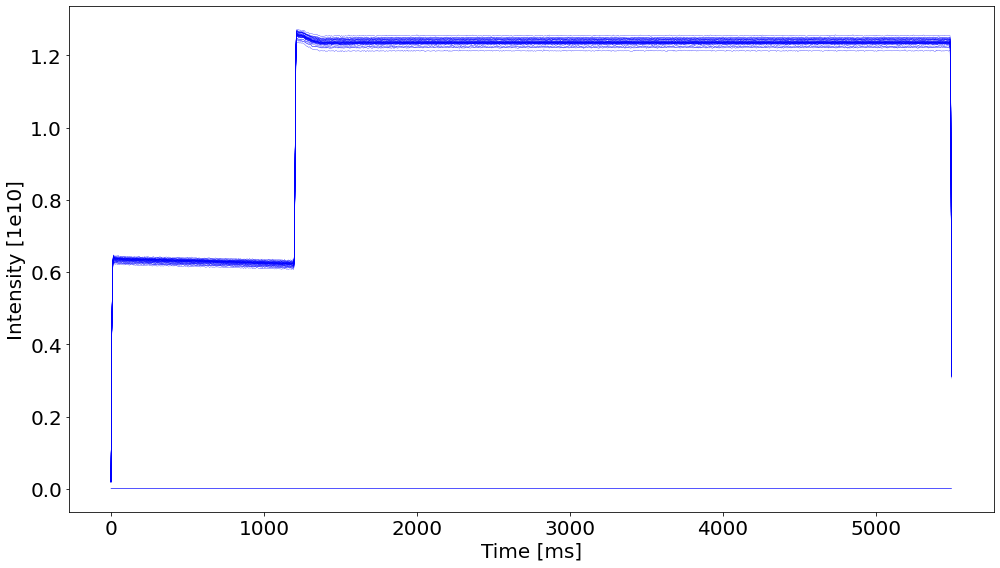

In [190]:
f, ax = plt.subplots(1,1,figsize=(14, 8))
fontsize=20
ax.set_xlabel('Time [ms]', fontsize=fontsize)
ax.set_ylabel('Intensity [1e10]', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)

for i in range(len(df)):
    x = df2.iloc[i]['intensity_ctimes']*1e3
    y = df2.iloc[i]['intensity_samples']/1e13
    ax.plot(x,y, '-', lw=0.3, c='blue')
    
f.tight_layout()

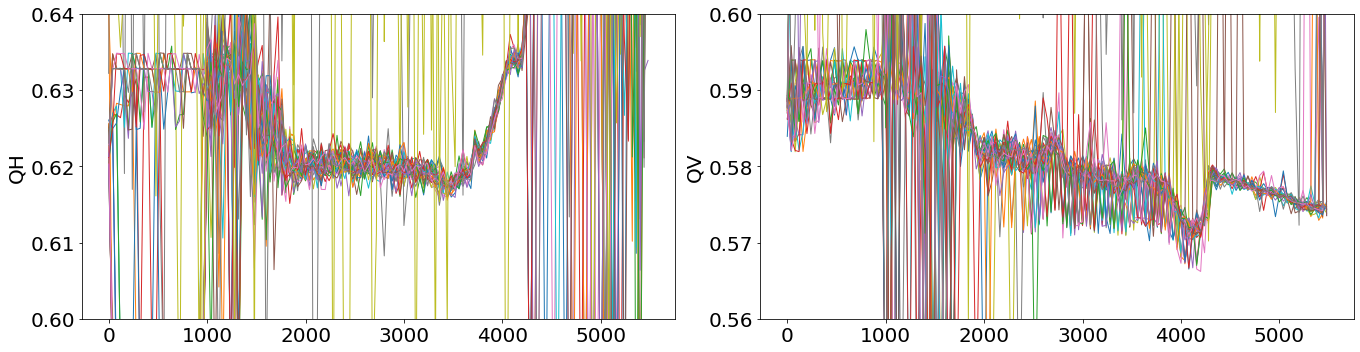

In [191]:
f, axs = plt.subplots(1,2,figsize=(19, 5))
fontsize=20

plane2lim = {'H': [0.6, 0.64], 'V': [0.56, 0.6]}

for i,plane in enumerate(['H', 'V']):
    ax = axs[i]
    #ax.set_xlabel('Time [ms]', fontsize=fontsize)
    ax.set_ylabel(f'Q{plane}', fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize)

    for i in range(len(df)):
        x = df2.iloc[i][f'tunect']
        y = 1-df2.iloc[i][f'tune{plane}']
        ax.plot(x, y, '-', lw=1)
    
    ax.set_ylim(plane2lim[plane][0], plane2lim[plane][1])
    
f.tight_layout()

In [192]:
'''
f, ax = plt.subplots(1,1,figsize=(18, 5))
fontsize=20
ax.set_xlabel('Time', fontsize=fontsize)
ax.set_ylabel('PS-SPS total transmission [%]', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
#date_form = DateFormatter("%Y-%m-%d %H:%M:%S")
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

ax.plot(df2['nxcals_timestamp'], np.divide(df2['sps_injected_intensity_1'], df2['ps_extracted_intensity_1'])*100, 'o', ms=5, c='green', label='1st injection')
ax.plot(df2['nxcals_timestamp'], np.divide(df2['sps_injected_intensity_2'], df2['ps_extracted_intensity_2'])*100, 'o', ms=5, c='red', label='2nd injection')
ax.plot(df2['nxcals_timestamp'], df2['total_ps_sps_transmission'], '-', ms=5, lw=3, c='blue')
ax.set_ylim(85,100)
    
ax.legend(loc=0, fontsize=fontsize-2)
f.tight_layout()
'''

'\nf, ax = plt.subplots(1,1,figsize=(18, 5))\nfontsize=20\nax.set_xlabel(\'Time\', fontsize=fontsize)\nax.set_ylabel(\'PS-SPS total transmission [%]\', fontsize=fontsize)\nax.tick_params(axis=\'both\', labelsize=fontsize)\n#date_form = DateFormatter("%Y-%m-%d %H:%M:%S")\ndate_form = DateFormatter("%H:%M")\nax.xaxis.set_major_formatter(date_form)\n\nax.plot(df2[\'nxcals_timestamp\'], np.divide(df2[\'sps_injected_intensity_1\'], df2[\'ps_extracted_intensity_1\'])*100, \'o\', ms=5, c=\'green\', label=\'1st injection\')\nax.plot(df2[\'nxcals_timestamp\'], np.divide(df2[\'sps_injected_intensity_2\'], df2[\'ps_extracted_intensity_2\'])*100, \'o\', ms=5, c=\'red\', label=\'2nd injection\')\nax.plot(df2[\'nxcals_timestamp\'], df2[\'total_ps_sps_transmission\'], \'-\', ms=5, lw=3, c=\'blue\')\nax.set_ylim(85,100)\n    \nax.legend(loc=0, fontsize=fontsize-2)\nf.tight_layout()\n'

In [193]:
300/420

0.7142857142857143

In [194]:
2100/5

420.0

In [195]:
600/2100

0.2857142857142857

In [196]:
100/420*10

2.380952380952381

In [ ]:
t